In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
CURRENT_WORKING_DIR = os.getcwd()

In [2]:
data_dir: str = os.path.join(CURRENT_WORKING_DIR, 'data')
game_data = pd.read_csv(f'{data_dir}/2019_3_12_4_13.csv')

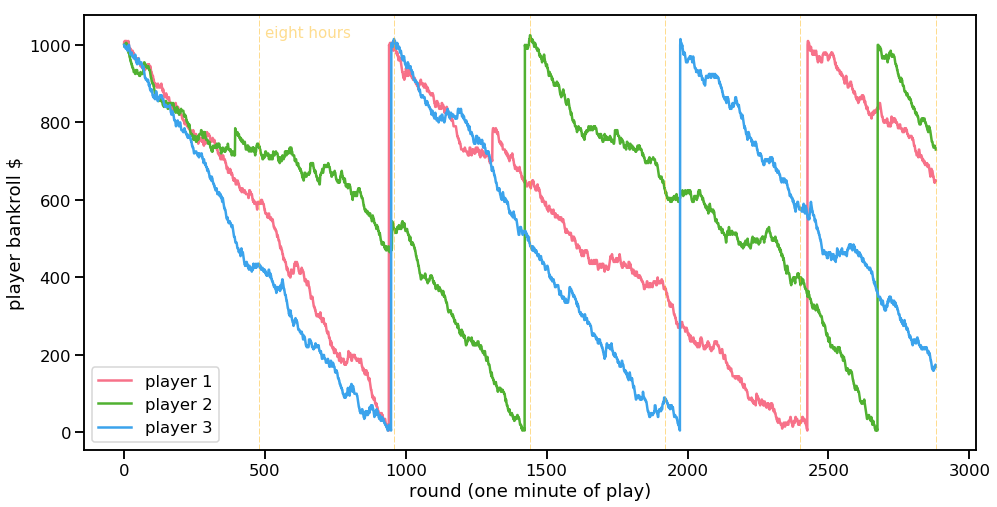

In [108]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette('husl', 3))
sns.set_context('talk')
game_round = 480
x = game_data['round']
y = game_data.drop('round', axis=1)
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
lines = plt.plot(x, y, linewidth=2.5)
hour_params = {'color': sns.xkcd_rgb['amber'], 'alpha': .45}
while game_round <= game_data.shape[0]:
    plt.axvline(x=game_round, dashes=[6, 2], **hour_params, linewidth=1)
    game_round += 480
plt.xlabel('round (one minute of play)')
ax.text(500, 1020, 'eight hours', fontsize=15, **hour_params)
plt.ylabel('player bankroll $')
plt.legend(lines, ['player 1', 'player 2', 'player 3'])
plt.show()